# Assignment 5 – Machine Learning in R

**Author**: Levi Duhaime  
**Email**: duhaime.6@osu.edu  
**Date**: 2025-07-24  
**Environment**: See `environment.yml`  
**Description**:  
This notebook explores basic machine learning using the R library caret, including data preparation, model training, and evaluation.

Tutorial followed:  
https://machinelearningmastery.com/machine-learning-in-r-step-by-step/

Dataset:  
https://archive.ics.uci.edu/ml/datasets/Iris

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

## 1. Create Conda Environment with R and caret

### 1.1 Load Conda, Create/Activate Environment, Launch Jupyter Lab

Example code:  
`module load miniconda3/24.1.2-py310`  
`cd my-directory`  
`conda env create -f environment.yml`  
`conda activate my-env`  
`jupyter lab`  

Use the environment.yml file in this Git Repo, or manually install:

`conda create -n r-caret-env -c conda-forge -c bioconda -c defaults \
  python=3.13.5 \
  r-base=4.3.3 \
  r-caret \
  r-ellipse \
  r-kernlab \
  r-randomforest \
  r-rpart \
  r-e1071 \
  r-ggplot2 \
  r-dplyr \
  r-tidyr \
  r-class \
  r-mass \
  r-lattice \
  jupyterlab \
  r-irkernel \
  r-ggally`

### 1.2 Load caret

In [2]:
library(caret)

## 2. Load Iris Data

See the header of this notebook to locate the iris dataset used in this example.

### 2.1 Load Data From .csv

The iris.csv file does not contain column names for the variables measured, so we will define those as well.

Download iris.csv and place the file in your working directory.

In [3]:
# Define the filename
filename <- "iris.csv"

# Load the .csv file from the local directory
dataset <- read.csv(filename, header=FALSE, stringsAsFactors = TRUE)

# Set column names within the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

### 2.2 Split Dataset for Training and Validation

Split the data 80%/20% for model training/validation.

Using the full dataset (including validation data) to train models gives artificially optimistic performance estimates

The validation set should remain completely hidden from the model during training.


Proper workflow:  
Train the model on 'training' → Select best model → Final evaluation on 'validation'

In [4]:
# Create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

# Select 20% of the data for validation
validation <- dataset[-validation_index,]

# Use the remaining 80% of data to train and test the models
training <- dataset[validation_index,]

## 3. Summarize Dataset

### 3.1 Dimensions of Dataset

If you split your data correctly in the previous step, you can call the term 'training' to evaluate that portion of the original dataset. Alternatively, substitute the term 'dataset' for 'training' to analyze all 150 samples instead.

This is our first output command for this example. If you don't see "150 5, 120 5" go back and double check that you installed caret correctly and that you have the iris.csv file in the correct directory.

In [5]:
# Dimensions of dataset
dim(dataset)
dim(training)

[1] 150   5

[1] 120   5

### 3.2 Types of Attributes

You can use 'dataset' and 'training' interchangeably whenever you see those terms called, up until the point at which we start training our model.

If you get an error here for 'Species,' it is likely due to it being defined as a sting instead of a factor, since it is non-numerical. The original tutorial did not include 'stringsAsFactors = TRUE' in the following line of code, which I needed to add in order to get sapply() to work correctly:  
`dataset <- read.csv(filename, header=FALSE, stringsAsFactors = TRUE)`

In [6]:
# List types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### 3.3 Peek at the Data

This line lets us visualize an excerpt from the beginning of our dataframe to see if our column attributes were appliead correctly.

In [7]:
# Take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### 3.4 Levels of the Class

The class variable is a factor. A factor is a class that has multiple class labels or levels. This command returns each designation for the class 'Species.'

In [8]:
# List the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

### 3.5 Class Distribution

We can summarize the frequency and proportion of our dataset belonging to each species with thise argument:

In [9]:
# Summarize the class distribution
percentage <- prop.table(table(training$Species)) * 100
cbind(freq=table(training$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### 3.6 Statistical Summary

Similarly, we can summarize  numerical attributes and gain useful information (*e.g.* mean and median values) on each.

In [10]:
# Summarize attribute distributions
summary(training)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.700   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.851   Mean   :3.066   Mean   :3.773   Mean   :1.218  
 3rd Qu.:6.500   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.825  
 Max.   :7.900   Max.   :4.200   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

## 4. Visualizing the Dataset

### 4.1 Univariate Plots

Univariate plots show the distribution of a single attribute within the dataset, independently of other variables.

First, we can categorize our attributes as inputs (*X*) and outputs (*Y*).

In [11]:
# Split input and output
x <- training[,1:4]
y <- training[,5]

Let's take a look at the dstribution of our input variables

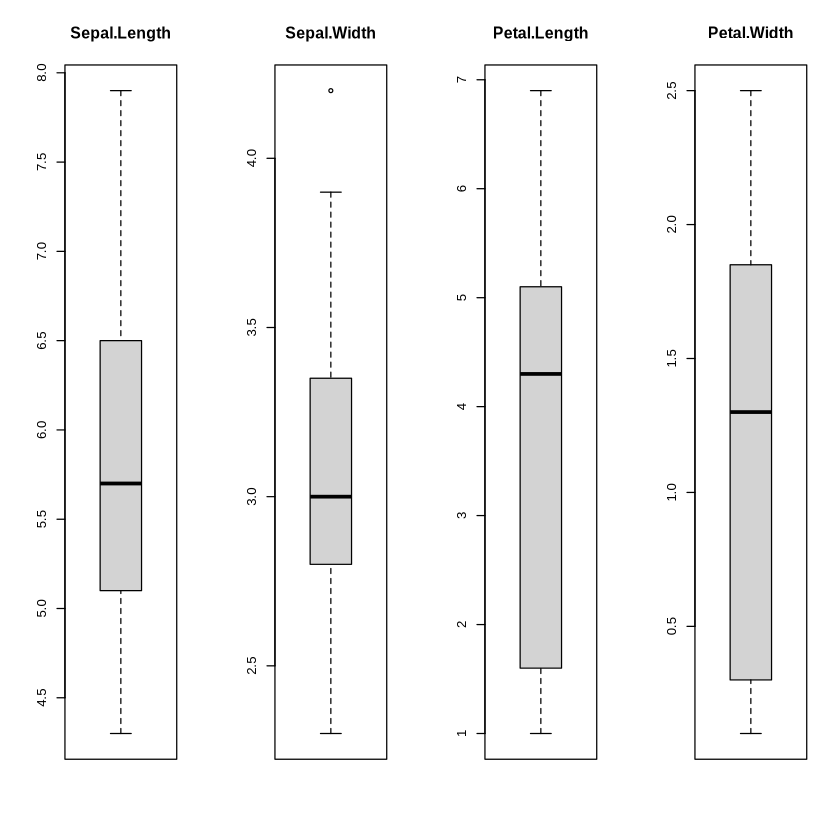

In [12]:
# Boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

Since our output attributes are non-numerical classes, we'll use a barchart instead.

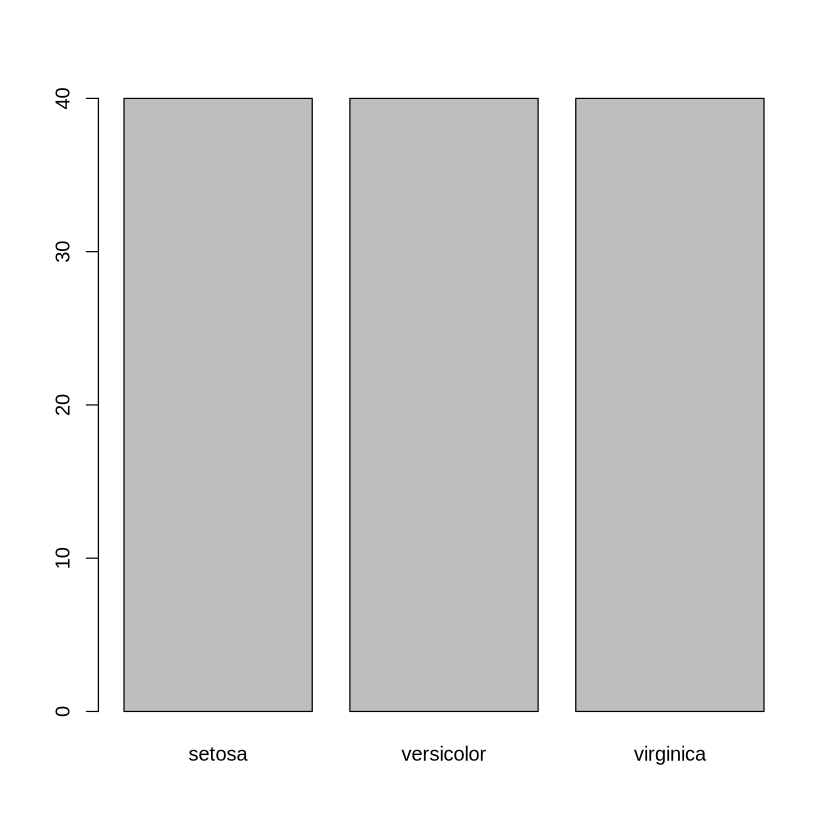

In [13]:
# Barplot for class breakdown
plot(y)

### 4.2 Multivariate Plots

Multivariate plots allow vizualization of interactions between variables.

Ellipses add additional vizual clarity to scatterplot series with tight distributions, such as those in the iris dataset.

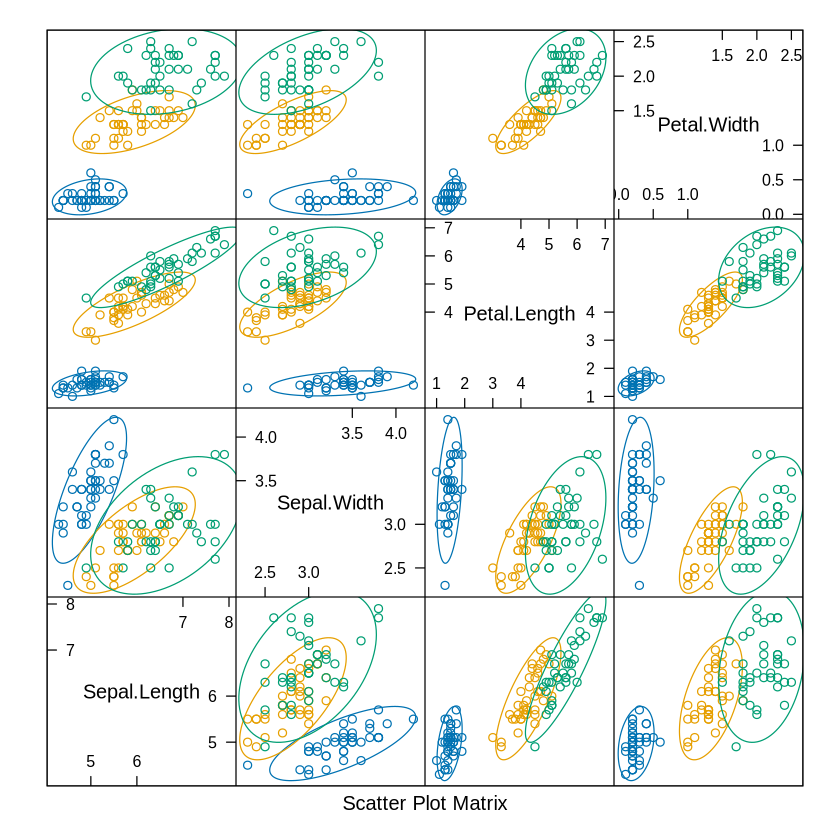

In [14]:
# Scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

Let's take another look at box and whisper plots for each input variable, but this time we will separate each input attribute by species to look for differences in attribute distributions.

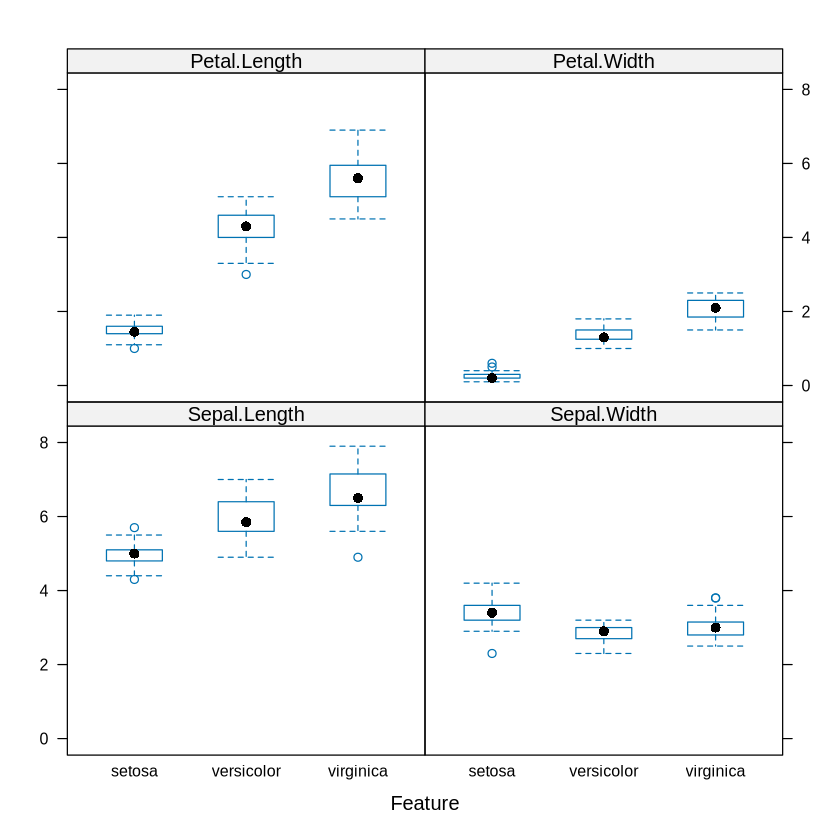

In [15]:
# Box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

Density plots are another tool for vizualization of attribute ditribution between classes (*i.e.* species). They depict the same data as the box and whisker plots, but with familiar bell curves to see if our data is normally distributed.

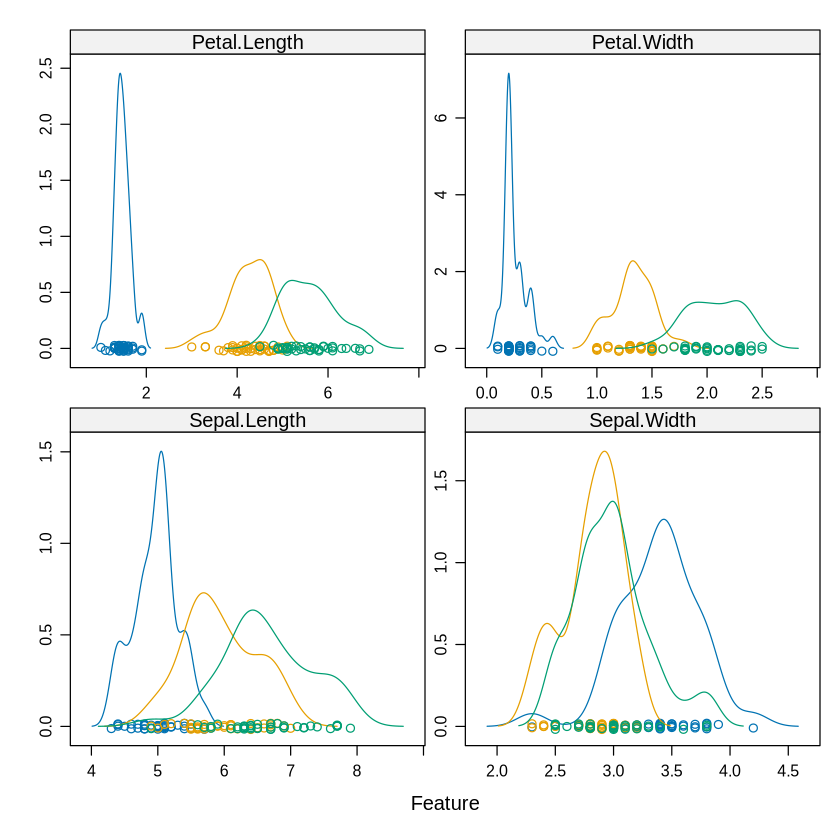

In [18]:
# Density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## 5. Evaluate Some Algorithms

Next we will subject our data to several analysis models in order to estimate their accuracy and choose the one that best describes it.

### 5.1 Test Hardness

First, we will perform 10-fold crossvalidation on our dataset. This splits the dataset into 10 equally sized parts, using 9 to train each model and 1 to test each combination of train-test splits.

This code won't give us an output until we specify some model(s)/algortihms to utilize it.

In [19]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### 5.2 Build Models

We will test a smattering of linear and nonlinear algorithms and evaluate their accuracy in describing our dataset:  

-Linear Discriminant Analysis (LDA)  
-Classification and Regression Trees (CART).  
-k-Nearest Neighbors (kNN).  
-Support Vector Machines (SVM) with a linear kernel.  
-Random Forest (RF)  

These algorithms were previously installed, either using the environment.yml method or manual method in section 1.1

In [20]:
# A) Linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=training, method="lda", metric=metric, trControl=control)

# B) Nonlinear algorithms

# CART
set.seed(7)
fit.cart <- train(Species~., data=training, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=training, method="knn", metric=metric, trControl=control)

# C) "Advanced" algorithms

# SVM
set.seed(7)
fit.svm <- train(Species~., data=training, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=training, method="rf", metric=metric, trControl=control)

### 5.3 Select Best Model

In [21]:
# Summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 0.9375000 1.0000000 0.9666667       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
svm  0.9166667 0.9166667 1.0000000 0.9666667       1    1    0
rf   0.8333333 0.9166667 0.9583333 0.9500000       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750 0.90625 1.0000 0.9500       1    1    0
cart 0.750 0.87500 0.9375 0.9125       1    1    0
knn  0.875 1.00000 1.0000 0.9750       1    1    0
svm  0.875 0.87500 1.0000 0.9500       1    1    0
rf   0.750 0.87500 0.9375 0.9250       1    1    0


We can now compare the accuracy of each of the 5 models that we tested and select the 'best' (*i.e.* most accurate) model for our dataset.

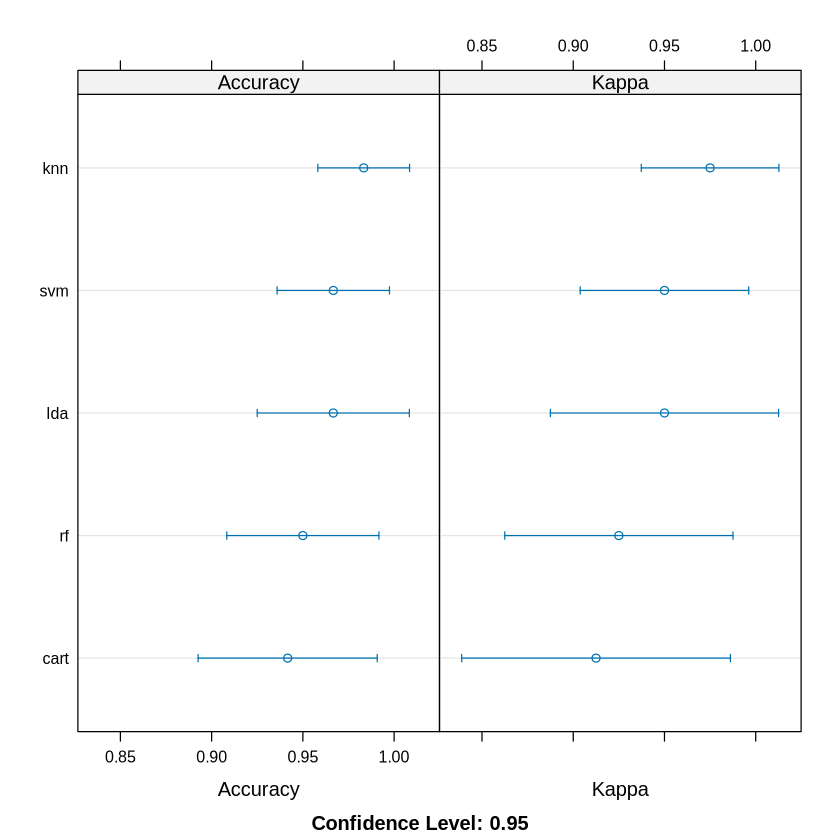

In [22]:
# Compare accuracy of models
dotplot(results)

In this case, the most accurate model was LDA (mean accuracy: 97.5%).

## 6. Make Predictions

Recall that we split our initial dataset into 'training' and 'validation' segments. Now that we have selected LDA as our model, let's verify it's accuracy utilizing the rest of our validation dataset

In [23]:
# Summarize "Best" Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9666667  0.95 



In [24]:
# Estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

We got an accuracy of 100%!